In [9]:
using RigorousInvariantMeasures
using Plots
using IntervalArithmetic
using LaTeXStrings
using Pkg
using StatsPlots
using TaylorModels
using LinearAlgebra
using Pseudospectra

#### In this notebook let make numerical experiments with Landford map.

In [10]:
D = mod1_dynamic(x->2*x + (1/2)*x*(1-x))

Piecewise-defined dynamic with 2 branches

In [11]:
B = Ulam(1024)

Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 1025))

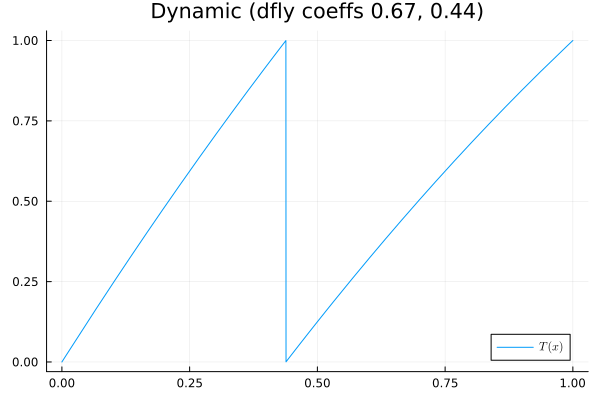

In [12]:
A, BB = dfly(strong_norm(B), aux_norm(B), D)
plot(D, title="Dynamic (dfly coeffs $(round(A, sigdigits=2)), $(round(BB, sigdigits=2)))", label=L"T(x)", legend=:bottomright)

#### Here we get the constants of
$$
\|P^nh\|_{BV(I)} \le A \lambda^n\|h\|_{BV(I)} + BB\|h\|_1.
$$
where $A = 1$

#### Inputs for Numerical Experiments

In [89]:
λ#first coeficient of the Lasota-Yorke in code is A

0.29702612714873305

In [90]:
BB#second coeficient of the Lasota-Yorke and Bound for ||h||_{BV}.

0.9466476012880646

We need computed the

$$
\|P^n_{\delta}h -P^nh \|_{1} \le \delta(C\|h\|_{BV(I)} + nD\|h\|_1),
$$

where

$$
C = \frac{\lambda+1}{1-\lambda} \text{  } \text{ and }\text{  }  D = BB(\lambda + 2).
$$

In [13]:
C = (A+1)/(1-A)

5.000000000000002

In [14]:
DD = BB*(A+2)

1.1851851851851853

#### Let we get $n_1$ for input the search matrix $\mathcal{M}$=MM.

$$
\mathcal{M} = \begin{pmatrix}
    \lambda^{n_1} & BB \\
    \delta C & \delta DD n_1 + \lambda
    \end{pmatrix}
$$
and the next 
$$
\mathcal{M} = \begin{pmatrix}
    \alpha^{n_1} & B \\
    M\varepsilon \left(\frac{1+\alpha}{1-\alpha}\right) & M\varepsilon B_0n_1(1+\alpha+M) + \alpha_2
\end{pmatrix}

$$

In [15]:
Q = DiscretizedOperator(B, D)

┌ Info: Assembling operator, the Newton stopping options are 
│       ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/joao/.julia/packages/RigorousInvariantMeasures/D0lUF/src/GenericAssembler.jl:145


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([1, 2, 3, 3, 4, 5, 5, 6, 7, 8  …  1018, 1019, 1020, 1020, 1021, 1021, 1022, 1023, 1023, 1024], [1, 1, 1, 2, 2, 2, 3, 3, 3, 3  …  1021, 1021, 1021, 1022, 1022, 1023, 1023, 1023, 1024, 1024], Interval{Float64}[[0.400031, 0.400032], [0.400093, 0.400094], [0.199874, 0.199875], [0.200281, 0.200282], [0.400218, 0.400219], [0.399499, 0.3995], [0.00078186, 0.000781861], [0.400344, 0.400345], [0.400406, 0.400407], [0.198467, 0.198468]  …  [0.00519481, 0.00519482], [0.66508, 0.665081], [0.329724, 0.329725], [0.335644, 0.335645], [0.664355, 0.664356], [0.00130039, 0.0013004], [0.665944, 0.665945], [0.332755, 0.332756], [0.333477, 0.333478], [0.666522, 0.666523]], 1024, 1024))

In [16]:
M = mid.(Q.L)

1024×1024 SparseArrays.SparseMatrixCSC{Float64, Int64} with 3086 stored entries:
⎡⢳⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠈⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠘⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠸⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⢹⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⢳⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⢳⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠘⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠹⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢧⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠳⡄⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⣄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣆⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢧⡀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠹⣄⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢦⎦

In [17]:
eigenvalues, vectors = eigen(Matrix(M))

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
1024-element Vector{ComplexF64}:
  -0.4656430357642425 - 0.05777766207006213im
  -0.4656430357642425 + 0.05777766207006213im
 -0.43069818425774403 - 0.06533695934997445im
 -0.43069818425774403 + 0.06533695934997445im
  -0.4287818833384013 - 0.1765892295046041im
  -0.4287818833384013 + 0.1765892295046041im
  -0.4277009009503131 + 0.0im
  -0.4258879319052947 - 0.03130051435025198im
  -0.4258879319052947 + 0.03130051435025198im
  -0.4162725890170323 - 0.15271006854983002im
                      ⋮
  0.40667689856932676 + 0.22751920571599407im
  0.42256143266655105 - 0.029485486021168513im
  0.42256143266655105 + 0.029485486021168513im
  0.42794010292094337 - 0.09483320542480655im
  0.42794010292094337 + 0.09483320542480655im
  0.46508901890884513 - 0.12099018054313608im
  0.46508901890884513 + 0.12099018054313608im
   0.5771243822227602 + 0.0im
                  1.0 + 0.0im
vectors:
1024×1024 Matrix{ComplexF64}:


Computing pseudospectra... 100%|████████████████████| Time: 0:00:19


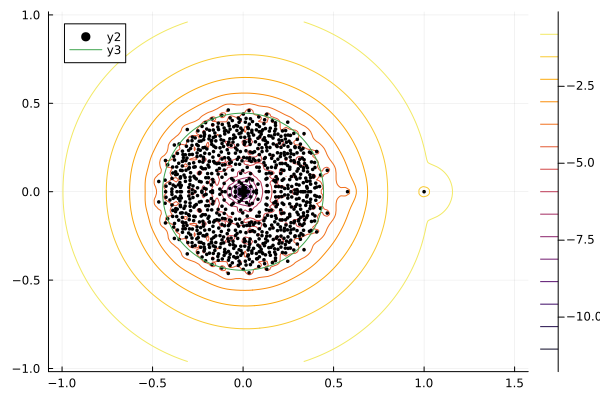

In [19]:
circ_y, circ_x = [A*sin(θ) for θ in 0:0.01:2*π], [A*cos(θ) for θ in 0:0.01:2*π]
spectralportrait(Matrix(mid.(M)))
plot!(A*circ_x, A*circ_y)

In [20]:
eigenvalues[2]

-0.4656430357642425 + 0.05777766207006213im

In [21]:
norms = powernormbounds(B, D; Q=Q)

64-element Vector{Float64}:
 1.0000000000103455
 1.0000000000206912
 1.000000000031037
 1.0000000000413827
 1.0000000000517284
 1.0000000000620741
 1.0000000000724198
 1.0000000000827656
 1.0000000000931113
 1.000000000103457
 ⋮
 8.930955145059505e-8
 5.1445756983458884e-8
 2.9628338169777574e-8
 1.711459824873885e-8
 9.886125625314941e-9
 5.712391292927556e-9
 3.2997220923370787e-9
 1.906881387012915e-9
 1.1013582367167752e-9

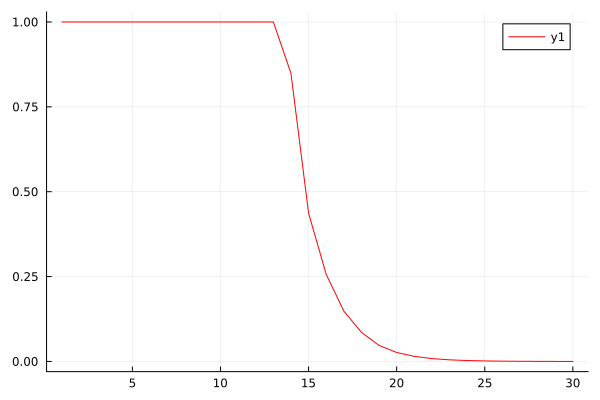

In [22]:
plot(1:30,norms[1:30], color = :red)

In [31]:
for i in 1:32
    if norms[i]<1/1024
        return i
    end
end

26

In [32]:
n1 = 26


26

In [33]:
norms[14]

0.8489075685783255

In [34]:
norms[26]

0.0009027715242539794

In [35]:
MM = [[A^n1 BB]
[(1/1024)*C (1/1024)*n1*DD+A]]

2×2 Matrix{Float64}:
 2.64014e-5  0.444444
 0.00488281  0.696759

In [36]:
A = MM^n1

2×2 Matrix{Float64}:
 4.11975e-7  5.90468e-5
 6.48707e-7  9.29766e-5

In [37]:
Au=eigvals(A)

2-element Vector{Float64}:
 0.0
 9.338854572994457e-5

In [38]:
ρ = Au[2]

9.338854572994457e-5

In [39]:
Av=eigvecs(A)

2×2 Matrix{Float64}:
 -0.999976    -0.536099
  0.00697693  -0.844155

In [45]:
Avv=[Av[3] Av[4]]

1×2 Matrix{Float64}:
 -0.536099  -0.844155

In [46]:
Avv'

2×1 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.5360988531941203
 -0.8441552106123311

In [47]:
A*(Avv')

2×1 Matrix{Float64}:
 -5.0065492267289935e-5
 -7.883442748944068e-5

In [48]:
ρ*(Avv')

2×1 Matrix{Float64}:
 -5.006549226728995e-5
 -7.883442748944068e-5

## Now let for $T^2$.

In [49]:
G = D∘D

RigorousInvariantMeasures.ComposedDynamic((Piecewise-defined dynamic with 2 branches, Piecewise-defined dynamic with 2 branches), Piecewise-defined dynamic with 4 branches)

In [51]:
A, BB = dfly(strong_norm(B), aux_norm(B), G)

(0.444618665888088, 0.7420186533743351)

In [52]:
C = (A+1)/(1-A)

2.6011293091045626

In [53]:
DD = BB*(A+2)

1.8139526504760428

In [54]:
Q = DiscretizedOperator(B, G)

┌ Info: Assembling operator, the Newton stopping options are 
│       ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/joao/.julia/packages/RigorousInvariantMeasures/D0lUF/src/GenericAssembler.jl:145


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([1, 2, 3, 4, 5, 6, 7, 7, 8, 9  …  1018, 1018, 1019, 1020, 1020, 1021, 1022, 1022, 1023, 1024], [1, 1, 1, 1, 1, 1, 1, 2, 2, 2  …  1021, 1022, 1022, 1022, 1023, 1023, 1023, 1024, 1024, 1024], Interval{Float64}[[0.160017, 0.160018], [0.160052, 0.160053], [0.160087, 0.160088], [0.160122, 0.160123], [0.160157, 0.160158], [0.160192, 0.160193], [0.0393693, 0.0393694], [0.120858, 0.120859], [0.160263, 0.160264], [0.160298, 0.160299]  …  [0.103264, 0.103265], [0.339101, 0.339102], [0.442684, 0.442685], [0.218214, 0.218215], [0.224788, 0.224789], [0.443322, 0.443323], [0.331888, 0.331889], [0.111753, 0.111754], [0.443962, 0.443963], [0.444283, 0.444284]], 1024, 1024))

In [55]:
M = mid.(Q.L)

1024×1024 SparseArrays.SparseMatrixCSC{Float64, Int64} with 5120 stored entries:
⎡⣇⠀⠀⠀⠀⠀⠀⢳⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⢸⠀⠀⠀⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠈⡇⠀⠀⠀⠀⠀⠀⠀⠈⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠘⡆⠀⠀⠀⠀⠀⠀⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⢳⠀⠀⠀⠀⠀⠀⠀⠀⢹⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⡇⠀⠀⠀⠀⠀⠀⢸⡀⠀⠀⠀⠀⠀⠀⠀⠀⠸⡄⠀⠀⠀⠀⠀⠀⠀⠀⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⢹⠀⠀⠀⠀⠀⠀⠀⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⣇⠀⠀⠀⠀⠀⠀⠀⠀⠸⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠘⡆⠀⠀⠀⠀⠀⠀⢸⡀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⣇⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠈⡇⠀⠀⠀⠀⠀⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⢳⠀⠀⠀⠀⠀⠀⠀⠀⠀⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠈⡇⠀⠀⠀⠀⠀⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠈⣇⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⣇⠀⠀⠀⠀⠀⠀⠀⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⡄⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠈⡇⠀⠀⠀⠀⠀⠀⠀⠀⠸⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⢳⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⡇⠀⠀⠀⠀⠀⠀⠀⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⣇⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⢧⠀⠀⠀⠀⠀⠀⠀⠈⡇⠀⠀⠀⠀⠀⠀⠀⠀⢸⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⡄⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⢸⡀⠀⠀⠀⠀⠀⠀⠀⢹⡀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⣇⠀⠀⠀⠀⠀⠀⠀⠀⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢧⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⢹⠀⠀⠀⠀⠀⠀⠀⠀⠸⡄⠀⠀⠀⠀⠀⠀⠀⠈⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣆⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⢳⠀⠀⠀⠀⠀⠀⠀⠀⢹⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⡄⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⢧⠀⠀⠀⠀⠀⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢹⡀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⢸⡀⠀⠀⠀⠀⠀⠀⠀⠀⢹⡀⠀⠀⠀⠀⠀⠀⠀⢹⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢳⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⣇⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢧⎦

Computing pseudospectra... 100%|████████████████████| Time: 0:00:18


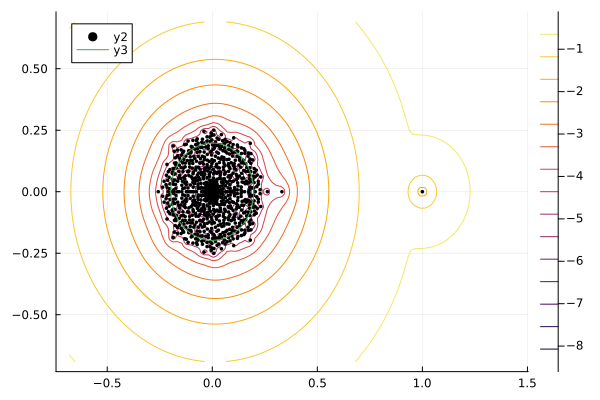

In [56]:
circ_y, circ_x = [A*sin(θ) for θ in 0:0.01:2*π], [A*cos(θ) for θ in 0:0.01:2*π]
spectralportrait(Matrix(mid.(M)))
plot!(A*circ_x, A*circ_y)

In [57]:
eigenvalues, vectors = eigen(Matrix(M))

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
1024-element Vector{ComplexF64}:
 -0.25699539167725105 + 0.0im
 -0.23598606742845613 - 0.018325950754136972im
 -0.23598606742845613 + 0.018325950754136972im
  -0.2291461213362002 - 0.04233285879927293im
  -0.2291461213362002 + 0.04233285879927293im
 -0.21994964741258677 - 0.028648813813840785im
 -0.21994964741258677 + 0.028648813813840785im
 -0.21821534926227984 - 0.06680104796211558im
 -0.21821534926227984 + 0.06680104796211558im
  -0.2154975584824847 - 0.11096999431468854im
                      ⋮
   0.2196335223919872 - 0.03052423090694971im
   0.2196335223919872 + 0.03052423090694971im
  0.22752980074053125 - 0.007916144494604864im
  0.22752980074053125 + 0.007916144494604864im
  0.23131118480413598 - 0.06004639250199608im
  0.23131118480413598 + 0.06004639250199608im
   0.2625129681342351 + 0.0im
    0.331506180723947 + 0.0im
   0.9999999999999976 + 0.0im
vectors:
1024×1024 Matrix{ComplexF64}:
 0.0360561

In [58]:
eigenvalues[2]

-0.23598606742845613 - 0.018325950754136972im

In [59]:
norms = powernormbounds(B, D; Q=Q)

32-element Vector{Float64}:
 1.0000000000103455
 1.0000000000206912
 1.000000000031037
 1.0000000000413827
 1.0000000000517284
 1.0000000000620741
 0.9991019595656586
 0.22448325013215745
 0.07209637645895771
 0.019318724320038488
 ⋮
 4.711225990540146e-6
 1.5499924965353761e-6
 5.491850993412175e-7
 1.8363796257896535e-7
 6.401821393073182e-8
 2.3634477382973524e-8
 7.584665345452923e-9
 2.9413159193040726e-9
 8.986059571227541e-10

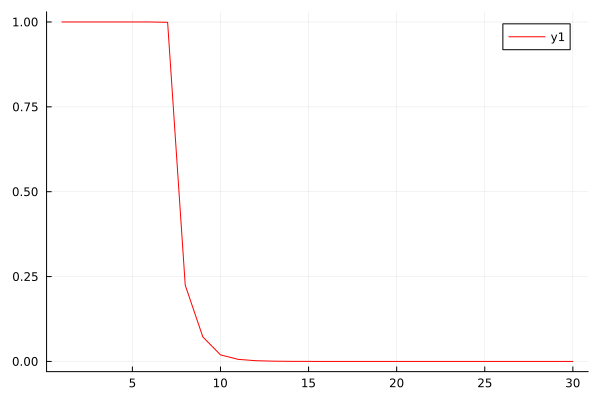

In [60]:
plot(1:30,norms[1:30], color = :red)

In [61]:
for i in 1:32
    if norms[i]<1/1024
        return i
    end
end

13

In [62]:
n1=13

13

In [63]:
MM = [[A^n1 BB]
[(1/1024)*C (1/1024)*n1*DD+A]]

2×2 Matrix{Float64}:
 2.65363e-5  0.742019
 0.00254017  0.467647

In [64]:
A = MM^n1

2×2 Matrix{Float64}:
 4.80195e-7  8.91549e-5
 3.05206e-7  5.66657e-5

In [65]:
Au=eigvals(A)

2-element Vector{Float64}:
 0.0
 5.7145918319277306e-5

In [71]:
ρ = Au[2]

5.7145918319277306e-5

In [66]:
Av=eigvecs(A)

2×2 Matrix{Float64}:
 -0.999985    -0.843958
  0.00538599  -0.536409

In [67]:
Avv=[Av[3] Av[4]]

1×2 Matrix{Float64}:
 -0.843958  -0.536409

In [68]:
Avv'

2×1 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.8439582479038039
 -0.5364088699817907

In [69]:
A*(Avv')

2×1 Matrix{Float64}:
 -4.822876909959115e-5
 -3.0653577469715254e-5

In [72]:
ρ*(Avv')

2×1 Matrix{Float64}:
 -4.822876909959117e-5
 -3.0653577469715254e-5